# Notebook para testear las funciones de la librería `toolbox_ML`.

## 0. Importar librerías y cargar datasets

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_diabetes, load_iris

import toolbox_ML as tb


In [40]:
# Variables que NO son DataFrames
variable_list = [1, 2, 3]

# Cargar dataset en local
df_ads = pd.read_csv('./data/advertising_ml.csv', index_col=None)
df_boston = pd.read_csv('./data/boston_houses.csv', sep='|')
df_housing = pd.read_csv('./data/ejemplo_housing.csv')
df_lifesat = pd.read_csv('./data/lifesat_full.csv')
df_titanic = pd.read_csv('./data/titanic.csv')
df_bank = pd.read_csv('./data/bank-full.csv', sep=";")

# Importar datasets de sklearn.datasets
df_iris = pd.DataFrame(load_iris()['data'], columns=load_iris()['feature_names'])
df_diabetes = pd.DataFrame(load_diabetes()['data'], columns=load_diabetes()['feature_names'])

----
----
----

# **Índice**



## **1. `describe_df`**
   - ### 1.1 Funcionamiento con diferentes DataFrames
   - ### 1.2 Detección de errores

## **2. `typify_variables`**
   - ### 2.1 Funcionamiento con diferentes DataFrames
   - ### 2.2 Detección de errores

## **3. `get_features_num_regression`**
   - ### 3.1 Funcionamiento con diferentes DataFrames
      * #### 3.1.1 Modificando el valor de "umbral_corr"
      * #### 3.1.2 Modificando el valor de "p-value"
   - ### 3.2 Detección de errores

## **4. `plot_features_num_regression`**
   - ### 4.1 Funcionamiento
   - ### 4.2 Detección de errores

## **5. `get_features_cat_regression`**
   - ### 5.1 Funcionamiento con diferentes DataFrames
   - ### 5.2 Detección de errores

## **6. `plot_features_cat_regression`**
   - ### 6.1 Funcionamiento
   - ### 6.2 Detección de errores

-----------------
-----------------
-----------------
-----------------
-----------------

# **`1. describe_df`**

### **1.1 `Funcionamiento con diferentes DataFrames`**

In [41]:
tb.describe_df(df_titanic)

COL_N,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
DATA_TYPE,int64,int64,object,float64,int64,int64,float64,object,object,object,bool,object,object,object,bool
MISSING (%),0.0,0.0,0.0,19.87,0.0,0.0,0.0,0.22,0.0,0.0,0.0,77.22,0.22,0.0,0.0
UNIQUE_VALUES,2,3,2,88,7,7,248,3,3,3,2,7,3,2,2
CARDIN (%),0.22,0.34,0.22,9.88,0.79,0.79,27.83,0.34,0.34,0.34,0.22,0.79,0.34,0.22,0.22


In [42]:
tb.describe_df(df_bank)

COL_N,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
DATA_TYPE,int64,object,object,object,object,int64,object,object,object,int64,object,int64,int64,int64,int64,object,object
MISSING (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,77,12,3,4,2,7168,2,2,3,31,12,1573,48,559,41,4,2
CARDIN (%),0.17,0.03,0.01,0.01,0.0,15.85,0.0,0.0,0.01,0.07,0.03,3.48,0.11,1.24,0.09,0.01,0.0


### **1.2 `detección de errores`**

In [43]:
try:
    tb.describe_df(variable_list)
except Exception as e:
    print(f'Error: {e}')

Error: Expected a pandas DataFrame


----
----

# **`2. typify_variables`**

### **2.1 `Funcionamiento con diferentes DataFrames`**

In [44]:
tb.typify_variables(df_titanic)

,nombre_variable,tipo_sugerido
0,survived,Binaria
1,pclass,Categórica
2,sex,Binaria
3,age,Numérica Discreta
4,sibsp,Categórica
5,parch,Categórica
6,fare,Numérica Discreta
7,embarked,Categórica
8,class,Categórica
9,who,Categórica


In [45]:
tb.typify_variables(df_bank)

,nombre_variable,tipo_sugerido
0,age,Numérica Discreta
1,job,Numérica Discreta
2,marital,Categórica
3,education,Categórica
4,default,Binaria
5,balance,Numérica Discreta
6,housing,Binaria
7,loan,Binaria
8,contact,Categórica
9,day,Numérica Discreta


### **2.2 `Detección de errores`**

In [46]:
try:
    tb.typify_variables(df_boston, umbral_categoria=12.6, umbral_continua=30)
except Exception as e:
    print(f'Error: {e}')

Error: Thresholds must be an integer and a float, respectively


In [47]:
try:
    tb.typify_variables(variable_list, umbral_categoria=12.6, umbral_continua=30)
except Exception as e:
    print(f'Error: {e}')

Error: Expected a pandas DataFrame


---
---

# **`3. get_features_num_regression`**

### **3.1 `Funcionamiento con diferentes DataFrames`**

In [48]:
### Ejemplo de funcionamiento

tb.get_features_num_regression(df_housing, 'median_house_value', umbral_corr=0.1, pvalue=0.05, umbral_card=15, pearson_results=False)

['latitude', 'housing_median_age', 'total_rooms', 'median_income']

In [49]:
### Ejemplo de funcionamiento --> Muestra valor test de hipotesis

tb.get_features_num_regression(df_housing, 'median_house_value', umbral_corr=0.1, pvalue=0.05, umbral_card=15, pearson_results=True)

columna=latitude, correlation=-0.14463821157621065, p_valor=6.132893372835514e-96
columna=housing_median_age, correlation=0.10643204687615469, p_valor=1.4961340817096898e-52
columna=total_rooms, correlation=0.1332941348083226, p_valor=1.2211718742796437e-81
columna=median_income, correlation=0.6883554753161123, p_valor=0.0


['latitude', 'housing_median_age', 'total_rooms', 'median_income']

#### **3.1.1 `Modificando el valor de "umbral_corr"`**

 **Ejemplo 1**

In [50]:
### Ejemplo 1 --> df_bank

umbral_corr_values = np.arange(0.01, 0.5, 0.1)
results = {}

for umbral_corr in umbral_corr_values:
    features = tb.get_features_num_regression(df_bank, 'balance', umbral_corr=umbral_corr, pvalue=0.40, umbral_card=12.5)
    results[umbral_corr] = features
    print(f"Umbral de Correlación: {round(umbral_corr, 2)} -> Features: {features}")

Umbral de Correlación: 0.01 -> Features: ['age', 'duration', 'campaign', 'previous']
Umbral de Correlación: 0.11 -> Features: []
Umbral de Correlación: 0.21 -> Features: []
Umbral de Correlación: 0.31 -> Features: []
Umbral de Correlación: 0.41 -> Features: []


**Ejemplo 2**

In [51]:
### Ejemplo 2 --> df_housing

umbral_corr_values = np.arange(0.01, 0.5, 0.1)
results = {}

for umbral_corr in umbral_corr_values:
    features = tb.get_features_num_regression(df_housing, 'median_house_value', umbral_corr=umbral_corr, pvalue=0.40, umbral_card=12.5)
    results[umbral_corr] = features
    print(f"Umbral de Correlación: {round(umbral_corr, 2)} -> Features: {features}")


Umbral de Correlación: 0.01 -> Features: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
Umbral de Correlación: 0.11 -> Features: ['latitude', 'total_rooms', 'median_income']
Umbral de Correlación: 0.21 -> Features: ['median_income']
Umbral de Correlación: 0.31 -> Features: ['median_income']
Umbral de Correlación: 0.41 -> Features: ['median_income']


**Ejemplo 3**

In [52]:
### Ejemplo 3 --> df_diabetes

umbral_corr_values = np.arange(0.01, 0.5, 0.1)
results = {}

for umbral_corr in umbral_corr_values:
    features = tb.get_features_num_regression(df_diabetes, 'bp', umbral_corr=umbral_corr, pvalue=0.40, umbral_card=12.5)
    results[umbral_corr] = features
    print(f"Umbral de Correlación: {round(umbral_corr, 2)} -> Features: {features}")

Umbral de Correlación: 0.01 -> Features: ['age', 'bmi', 's1', 's2', 's3', 's4', 's5', 's6']
Umbral de Correlación: 0.11 -> Features: ['age', 'bmi', 's1', 's2', 's3', 's4', 's5', 's6']
Umbral de Correlación: 0.21 -> Features: ['age', 'bmi', 's1', 's4', 's5', 's6']
Umbral de Correlación: 0.31 -> Features: ['age', 'bmi', 's5', 's6']
Umbral de Correlación: 0.41 -> Features: []


#### **3.1.2 `Modificando el valor de "p-value"`**

**Ejemplo 1**

In [53]:
### Ejemplo 1 --> df_housing

p_values = [1e-6, 0.05] 
results = {}

for p_value in p_values:
    features = tb.get_features_num_regression(df_housing, 'median_house_value', umbral_corr=0.01, pvalue=p_value, umbral_card=12.5)
    results[p_value] = features
    print(f"p-value: {round(p_value, 2)} -> Features: {features}")


p-value: 0.0 -> Features: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'households', 'median_income']
p-value: 0.05 -> Features: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']


**Ejemplo 2**

In [54]:
### Ejemplo 2 --> df_iris

p_values = [1e-6, 0.9] 
results = {}

for p_value in p_values:
    features = tb.get_features_num_regression(df_iris, 'sepal length (cm)', umbral_corr=0.01, pvalue=p_value, umbral_card=12.5)
    results[p_value] = features
    print(f"p-value: {round(p_value, 2)} -> Features: {features}")

p-value: 0.0 -> Features: ['petal length (cm)', 'petal width (cm)']
p-value: 0.9 -> Features: ['sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### **3.2 `Detección de errores`**

In [55]:
tb.get_features_num_regression(variable_list, 'survived', umbral_corr=0.07, pvalue=0.40)

Error: Expected a pandas DataFrame


In [56]:
# La supervivencia del Titanic es un ejemplo de clasificación, y por tanto la cardinalidad del problema es baja
tb.get_features_num_regression(df_titanic, 'survived', umbral_corr=0.07, pvalue=0.40)

Error: survived tiene una cardinalidad inferior a 10.0.


In [57]:
tb.get_features_num_regression(df_housing, 'ocean_proximity', umbral_corr=0.07, pvalue=0.40)

Error: ocean_proximity no es una columna numérica.


In [58]:
tb.get_features_num_regression(df_housing, 'xxxx', umbral_corr=0.07, pvalue=0.40)

Error: xxxx no es una columna del DataFrame.


---
---

# **`4. plot_features_num_regression`**

### **4.1 `Funcionamiento`**

**Seleccionando columnas**

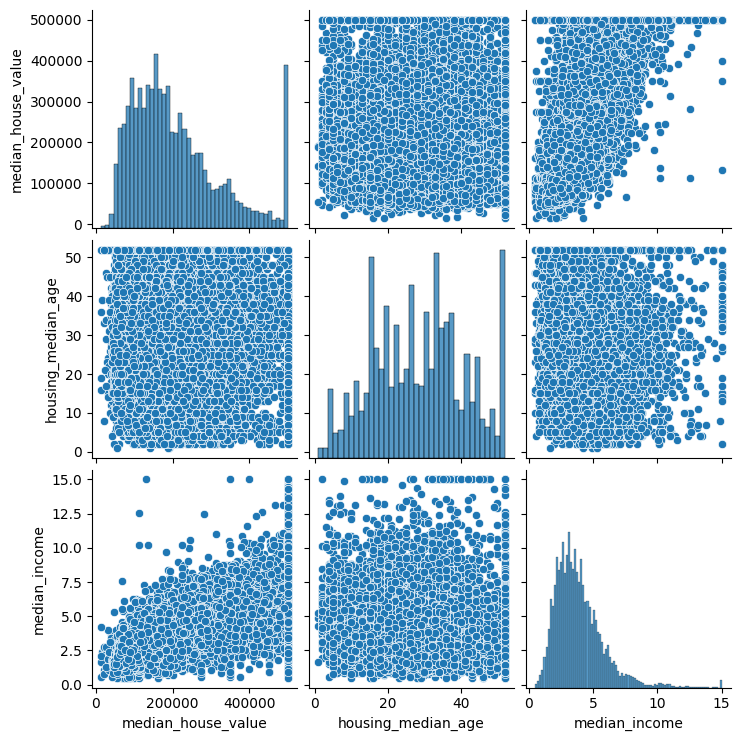

['housing_median_age', 'median_income']

In [59]:
tb.plot_features_num_regression(df_housing, 
                                target_col="median_house_value", 
                                columns=['housing_median_age', 'median_income'],
                                umbral_corr = 0.07,
                                pvalue=0.40)

**NO seleccionando columnas**

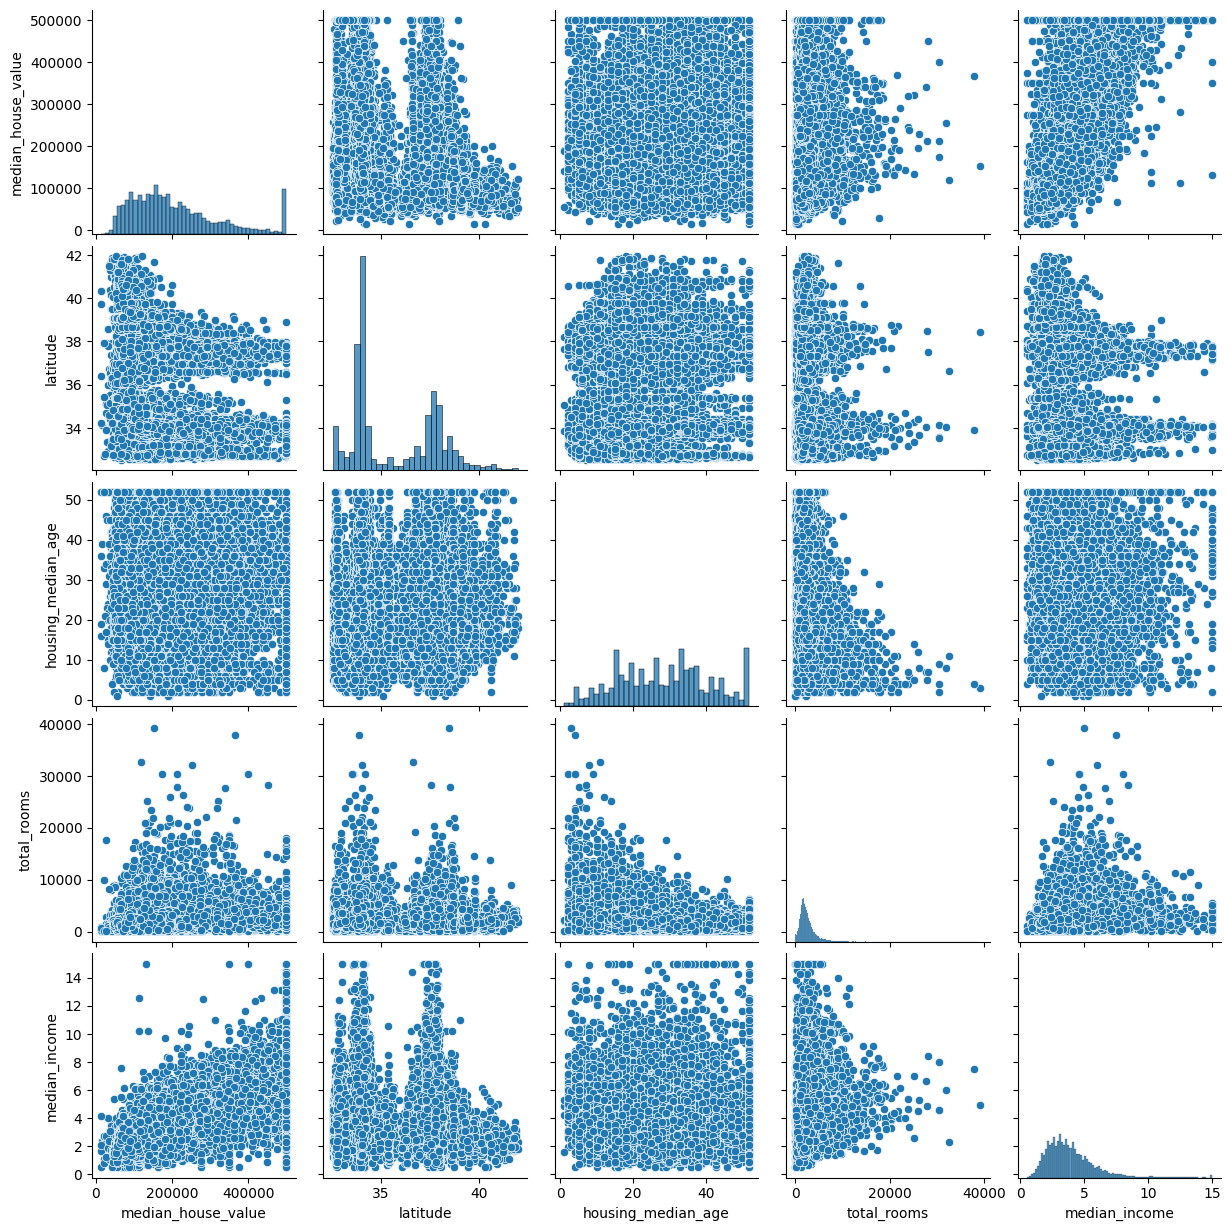

['latitude', 'housing_median_age', 'total_rooms', 'median_income']

In [60]:
tb.plot_features_num_regression(df_housing, 
                                target_col="median_house_value",
                                umbral_corr = 0.07,
                                pvalue=0.40)

### **4.2 `Detección de errores`**

In [61]:
tb.plot_features_num_regression(df_titanic, 
                                target_col="fare", 
                                columns=[])

Error: Ninguna columna cumple con los criterios de correlación y significancia.


In [62]:
tb.plot_features_num_regression(df_housing)

Error:  no es una columna del DataFrame.


In [63]:
tb.plot_features_num_regression(df_titanic, 
                                target_col="fare", 
                                columns=[])

Error: Ninguna columna cumple con los criterios de correlación y significancia.


In [64]:
tb.plot_features_num_regression(df_housing, 
                                target_col="median_house_value", 
                                columns=['housing_median_age', 'median_income'],
                                umbral_corr = 0.8,
                                pvalue=0.05)

Error: Ninguna columna cumple con los criterios de correlación y significancia.


In [65]:
tb.plot_features_num_regression(df_housing, 
                                target_col="precio", 
                                columns=['housing_median_age', 'median_income'],
                                umbral_corr = 0.8,
                                pvalue=0.05)

Error: precio no es una columna del DataFrame.


---
---

# **`5. Función "get_features_cat_regression`**

### **5.1 `Funcionamiento con diferentes DataFrames`**

**Ejemplo 1**

In [66]:
tb.get_features_cat_regression(df_titanic, "survived", pvalue=0.01)

c:\Users\Luis\OneDrive\Documentos\Boot_Camp_Data_Science\Tool_BOX_ML\toolbox_machine_learning\toolbox_ML.py:465: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_val, p_val = f_oneway(*grupos)


['survived',
 'pclass',
 'sex',
 'sibsp',
 'parch',
 'class',
 'who',
 'adult_male',
 'alive',
 'alone']

**Ejemplo 2**

In [67]:
tb.get_features_cat_regression(df_housing, "median_house_value", pvalue=0.05)

['ocean_proximity']

**Ejemplo 3**

In [68]:
tb.get_features_cat_regression(df_lifesat, "Life satisfaction", pvalue=0.1)

[]

### **5.2 `Detección de errores`**

In [69]:
tb.get_features_cat_regression(df_lifesat, "Life", pvalue=0.1)

Error: La columna objetivo no existe en el DataFrame.


In [70]:
tb.get_features_cat_regression(df_titanic, "age", pvalue=2)

Error: El valor de pvalue debe estar entre 0 y 1.


---
---

# **`6. plot_features_cat_regression`**

### **6.1 `Funcionamiento`**

**Plotea en conjunto**

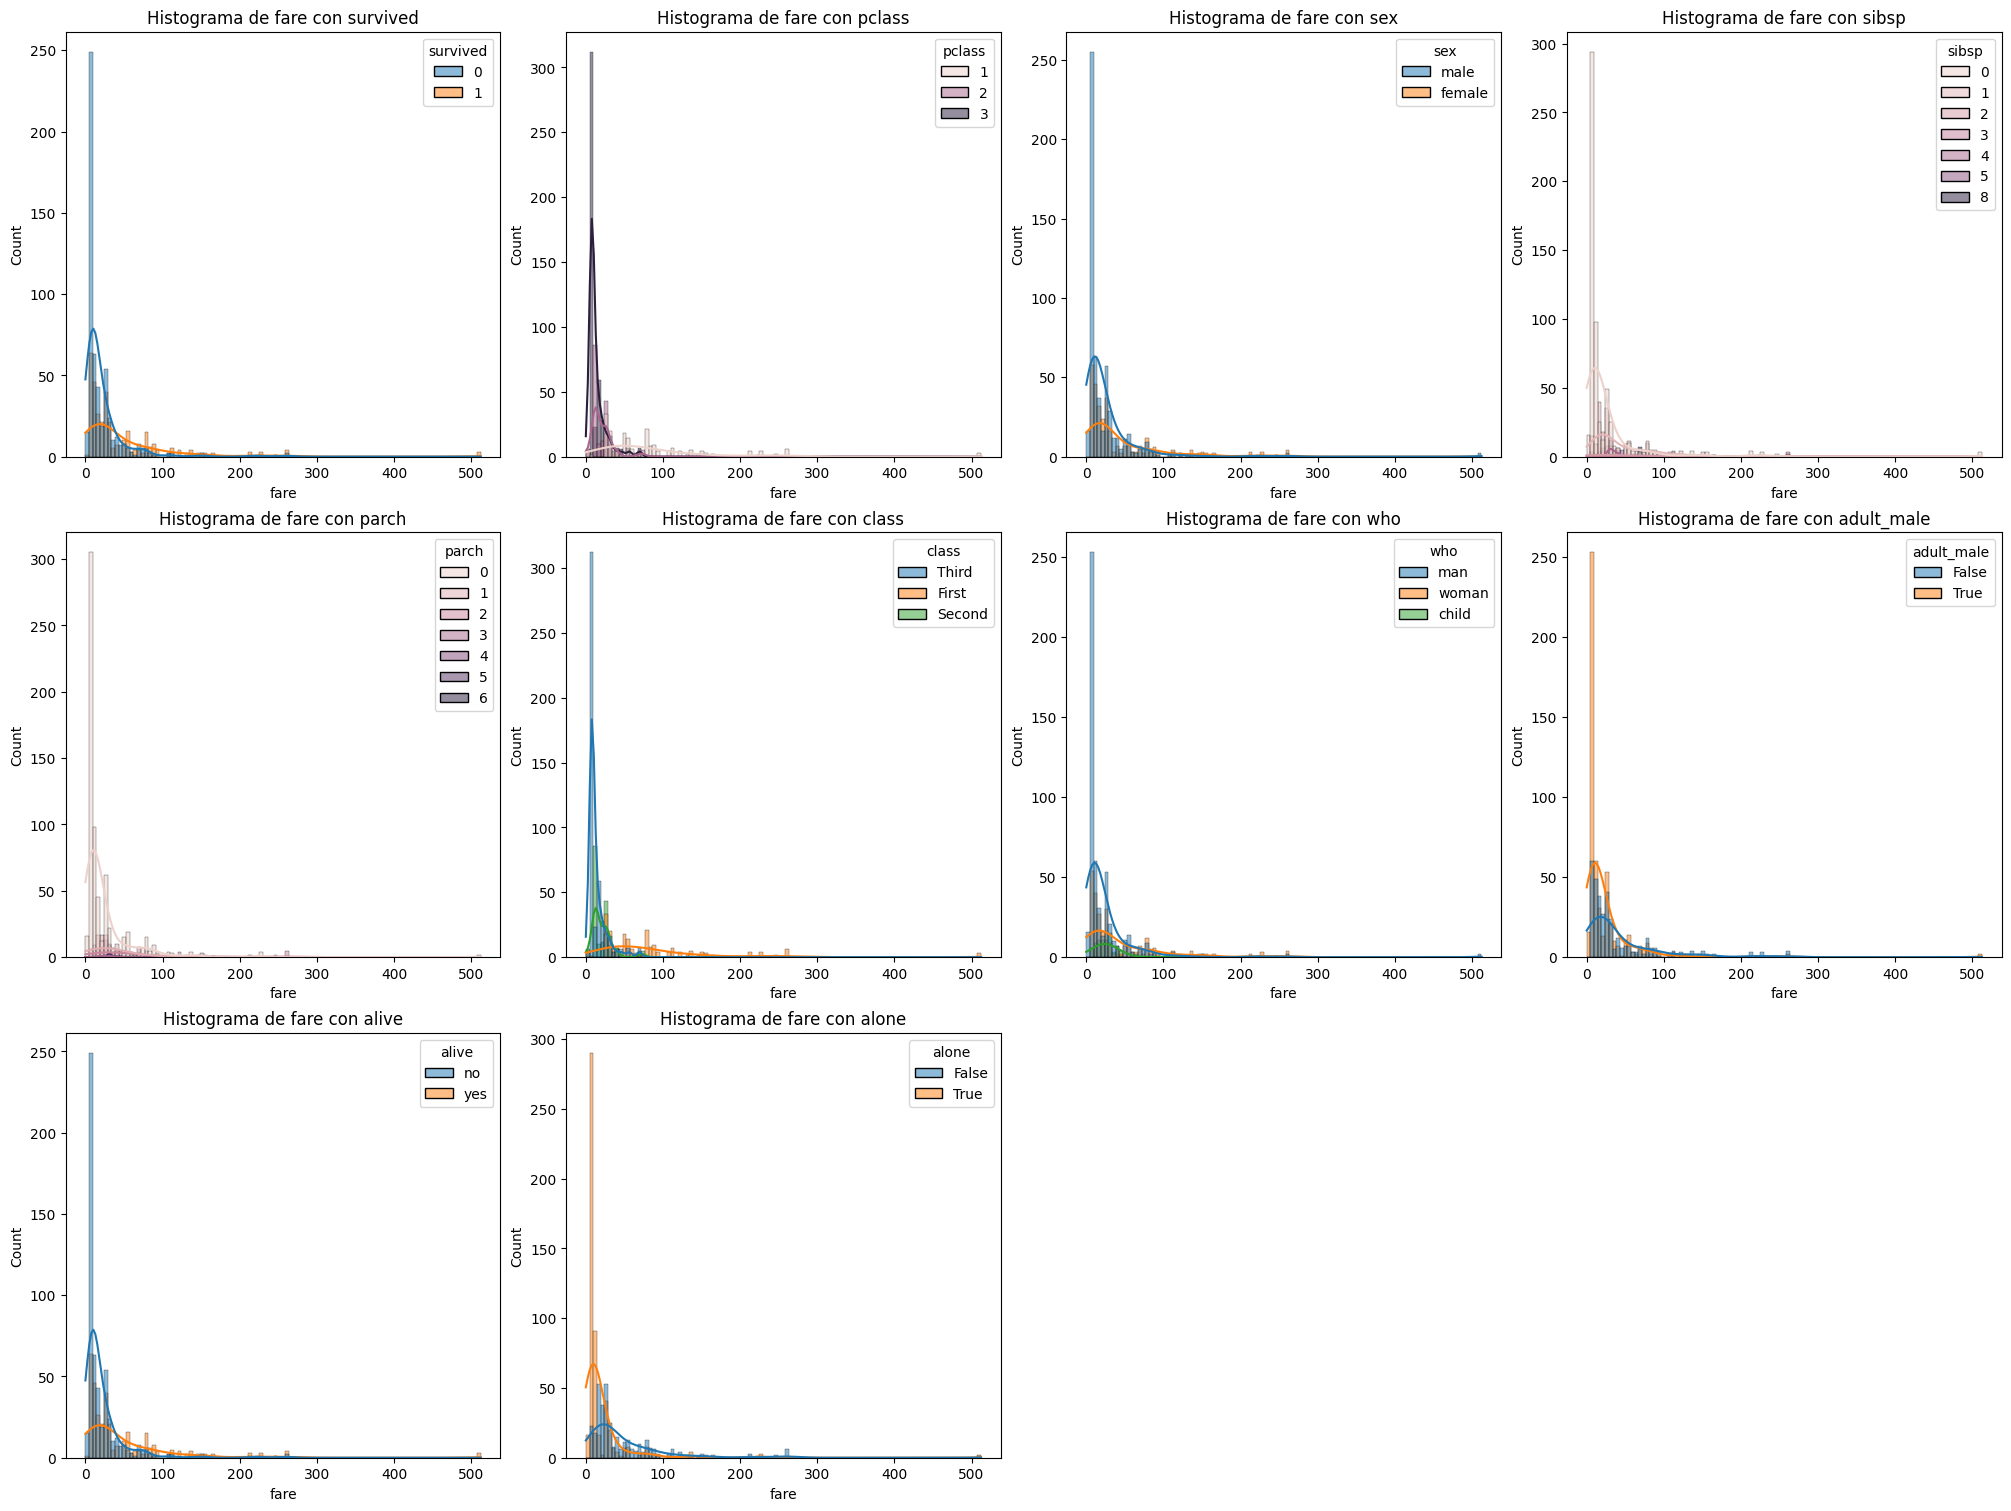

['survived',
 'pclass',
 'sex',
 'sibsp',
 'parch',
 'class',
 'who',
 'adult_male',
 'alive',
 'alone']

In [71]:
tb.plot_features_cat_regression(df_titanic, 
                                target_col='fare', 
                                columns=[], 
                                pvalue=0.05,
                                with_individual_plot=False,
                                umbral_categoria=10,
                                umbral_card=10.0
)


**Plotea individualmente**

c:\Users\Luis\OneDrive\Documentos\Boot_Camp_Data_Science\Tool_BOX_ML\toolbox_machine_learning\toolbox_ML.py:465: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_val, p_val = f_oneway(*grupos)


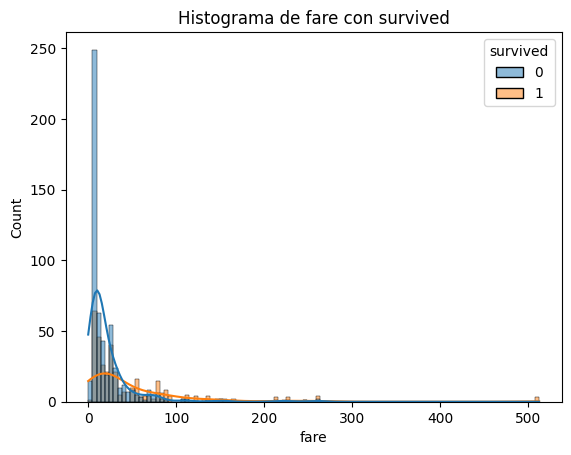

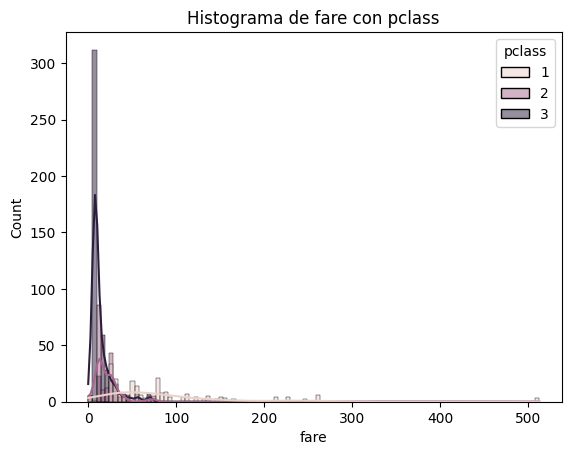

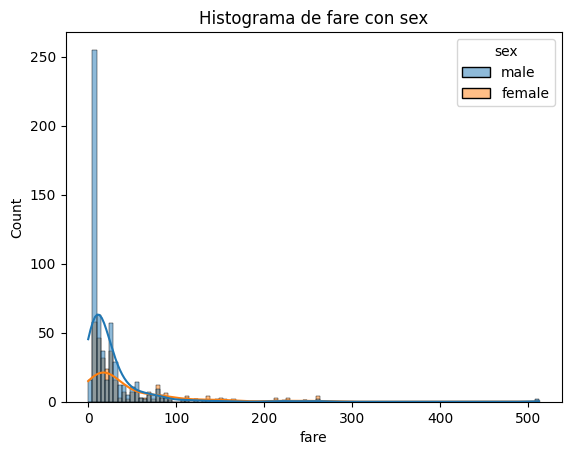

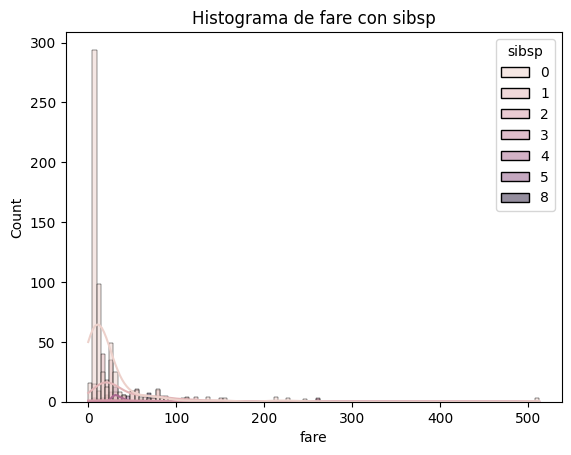

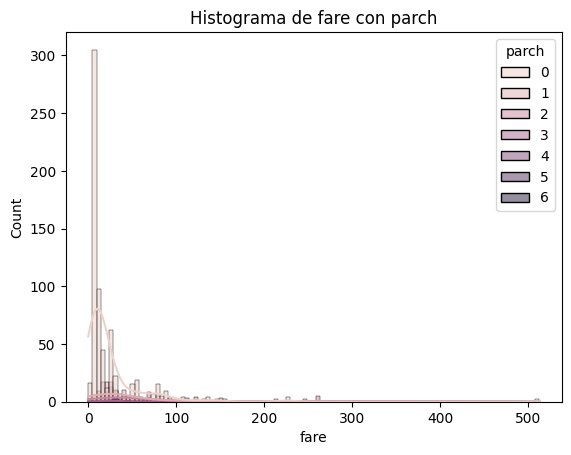

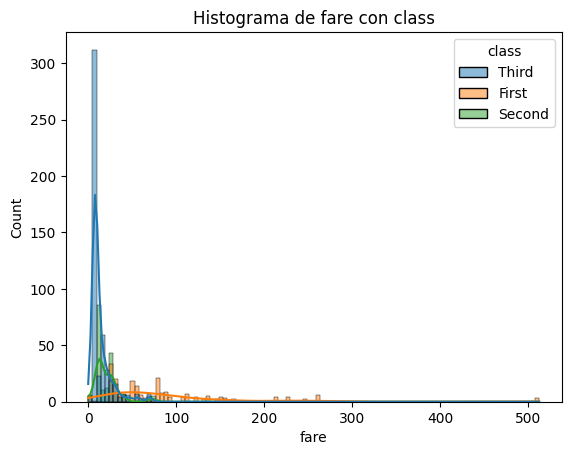

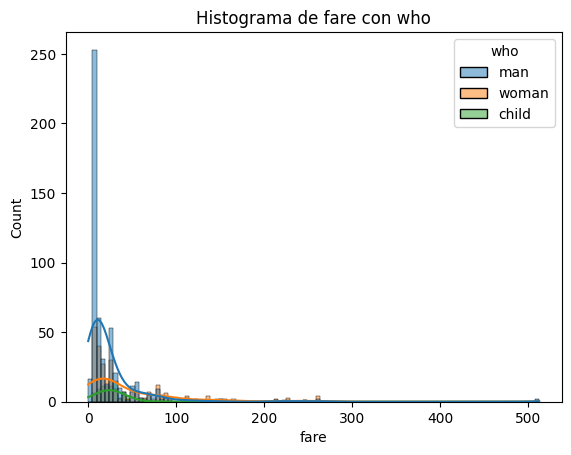

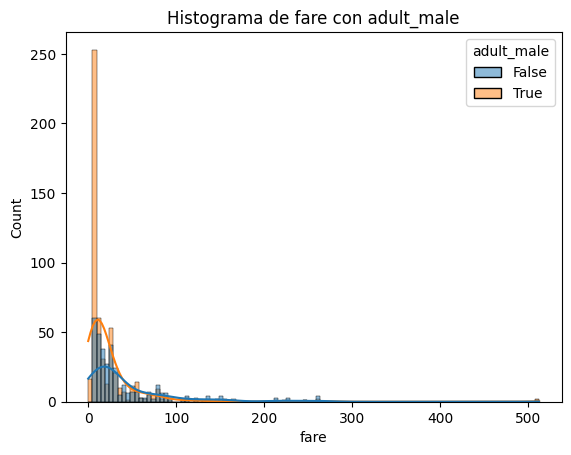

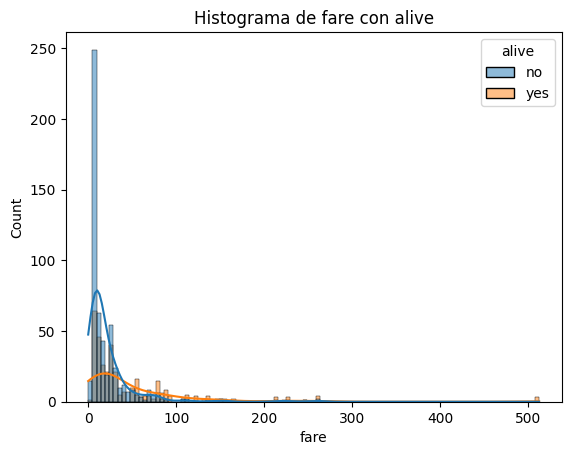

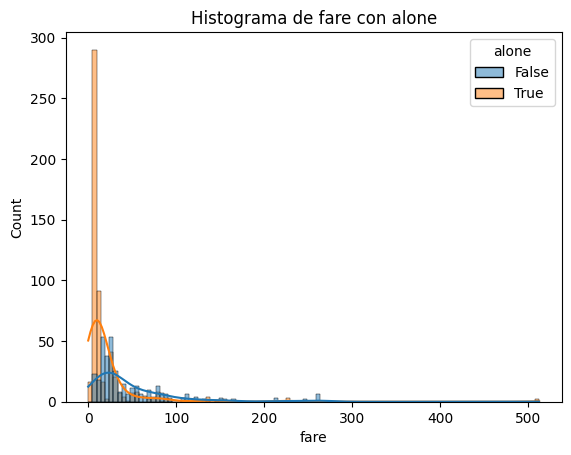

['survived',
 'pclass',
 'sex',
 'sibsp',
 'parch',
 'class',
 'who',
 'adult_male',
 'alive',
 'alone']

In [72]:


tb.plot_features_cat_regression(df_titanic, 
                                target_col='fare', 
                                columns=[], 
                                pvalue=0.05,
                                with_individual_plot=True,
                                umbral_categoria=10,
                                umbral_card=10.0
)

### **6.2 `Detección de errores`**

In [73]:
tb.plot_features_cat_regression(df_titanic, 
                                target_col='', 
                                columns=[], 
                                pvalue=0.05,
                                with_individual_plot=True,
                                umbral_categoria=10,
                                umbral_card=10.0
)

Error: La columna objetivo no existe en el DataFrame.


In [74]:
tb.plot_features_cat_regression(df_titanic, 
                                target_col='fare', 
                                columns=['age'], 
                                pvalue=0.05,
                                with_individual_plot=True,
                                umbral_categoria=10,
                                umbral_card=10.0
)

Error: Ninguna columna de 'columns' cumple con el criterio de significancia.


c:\Users\Luis\OneDrive\Documentos\Boot_Camp_Data_Science\Tool_BOX_ML\toolbox_machine_learning\toolbox_ML.py:465: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_val, p_val = f_oneway(*grupos)
